In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris



In [2]:
iris = load_iris()
x = iris.data
y = iris.target


In [3]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

Random Forest Accuracy: 100.0%
confusion_matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


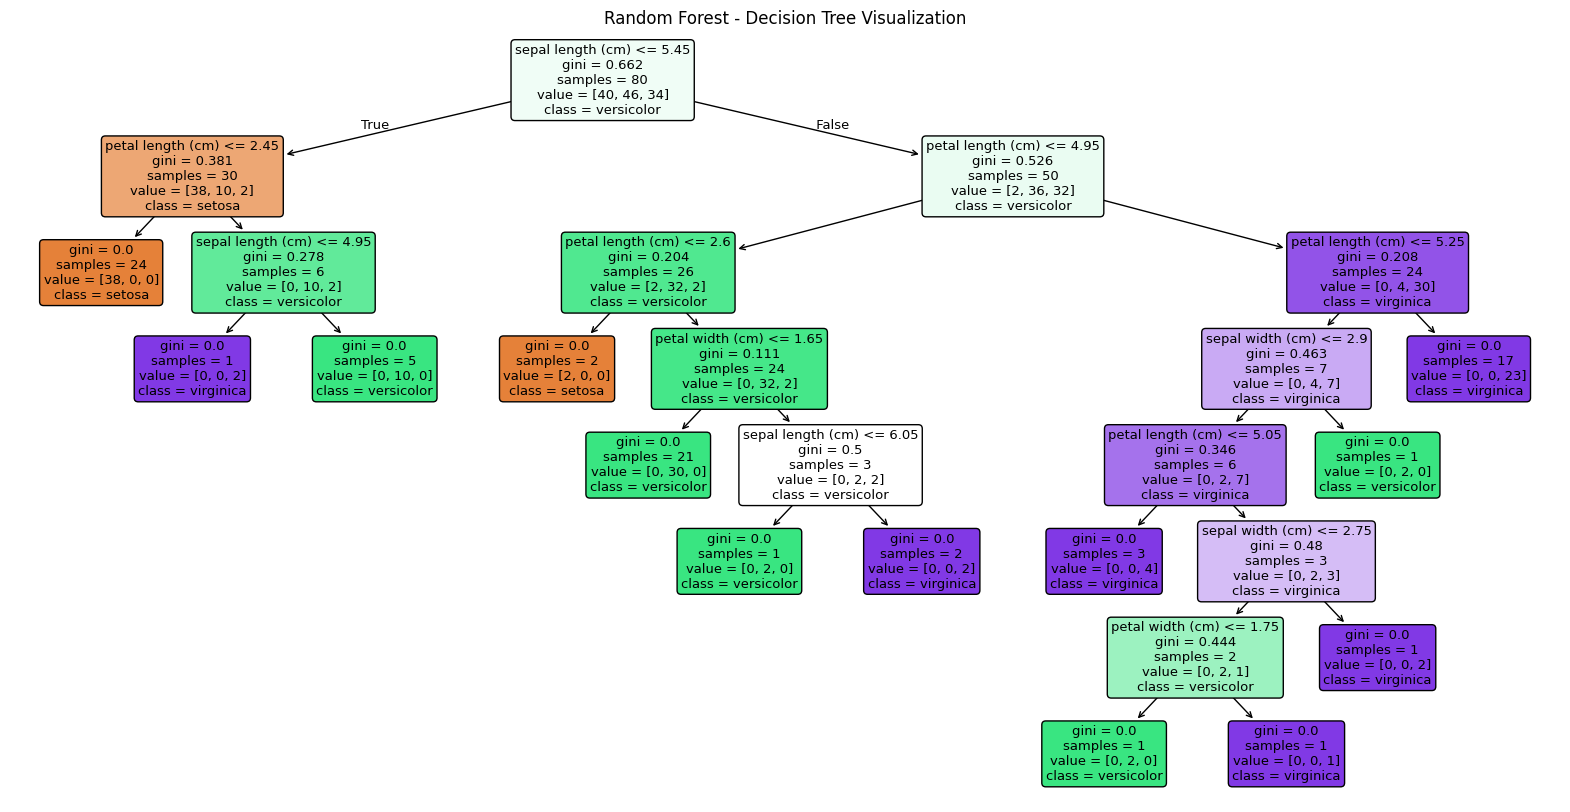

In [4]:
#bagging

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred) * 100}%")
print(f"confusion_matrix: {confusion_matrix(y_test,y_pred)}")
plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[3], filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title('Random Forest - Decision Tree Visualization')
plt.show()


In [5]:
knn_version = KNeighborsClassifier(n_neighbors=5)

baggin_clf = BaggingClassifier(estimator= knn_version, random_state=42)

baggin_clf.fit(x_train, y_train)
y_pred = baggin_clf.predict(x_test)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred) * 100}%")


KNN Accuracy: 100.0%


In [6]:
baggin_clf.estimators_

[KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier()]

In [7]:
baggin_clf.estimators_[0]


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
clf.estimators_[0].feature_importances_

array([0.06124457, 0.00819187, 0.53417935, 0.39638421])